In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=17)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7396574947084856
Test Acc :  0.7430769230769231


In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.54      0.60       476
         1.0       0.76      0.86      0.81       824

    accuracy                           0.74      1300
   macro avg       0.73      0.70      0.71      1300
weighted avg       0.74      0.74      0.73      1300



In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[255, 221],
       [113, 711]], dtype=int64)

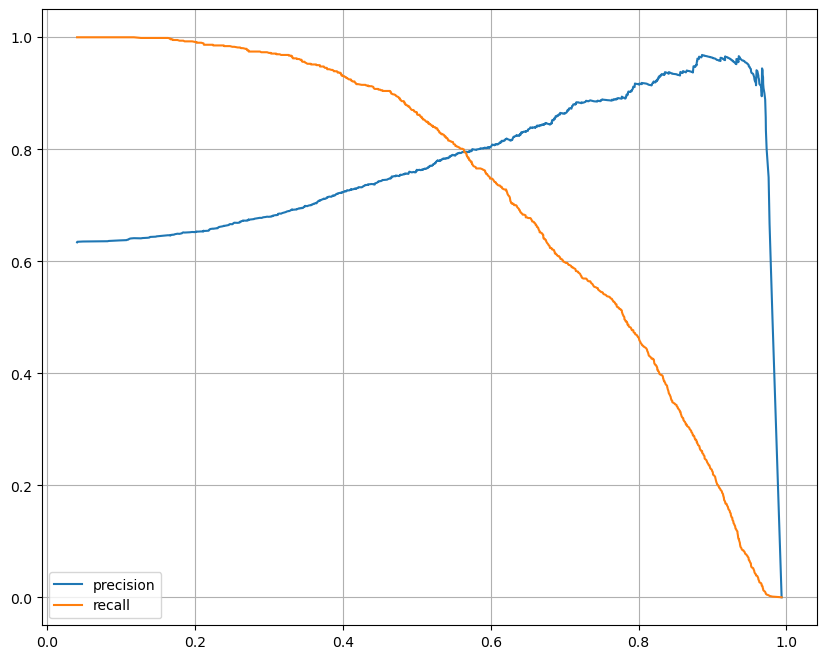

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

In [7]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.35278762, 0.64721238],
       [0.3593901 , 0.6406099 ],
       [0.20535762, 0.79464238]])

In [8]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.35278762, 0.64721238, 1.        ],
       [0.3593901 , 0.6406099 , 1.        ],
       [0.20535762, 0.79464238, 1.        ],
       ...,
       [0.21921584, 0.78078416, 1.        ],
       [0.41972354, 0.58027646, 1.        ],
       [0.61574874, 0.38425126, 0.        ]])

In [9]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1]
pred_bin

array([1., 1., 1., ..., 1., 0., 0.])

In [10]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.54      0.60       476
         1.0       0.76      0.86      0.81       824

    accuracy                           0.74      1300
   macro avg       0.73      0.70      0.71      1300
weighted avg       0.74      0.74      0.73      1300



In [11]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.61      0.69      0.65       476
         1.0       0.81      0.75      0.78       824

    accuracy                           0.73      1300
   macro avg       0.71      0.72      0.71      1300
weighted avg       0.73      0.73      0.73      1300

